In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import stats

In [2]:
sea_ice_csv = "../Resources/Arctic_Sea_Ice_Extent.csv"

sea_ice_data = pd.read_csv(sea_ice_csv)
sea_ice_data

,Date,MillionSqKm
0,10/26/78,10.231
1,10/28/78,10.420
2,10/30/78,10.557
3,11/1/78,10.670
4,11/3/78,10.777
...,...,...
12746,3/27/18,14.256
12747,3/28/18,14.302
12748,3/29/18,14.238
12749,3/30/18,14.232


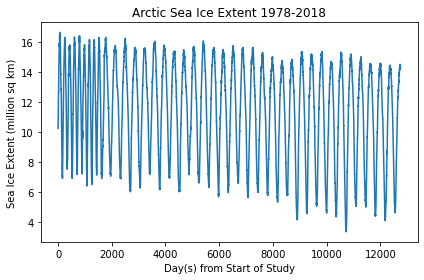

In [3]:
x_axis = sea_ice_data["Date"]
tick_locations=[]
for x in x_axis:
    tick_locations.append(x)
y_axis = sea_ice_data['MillionSqKm']

sea_ice_data.plot(kind='line',legend=False)

plt.title('Arctic Sea Ice Extent 1978-2018')
plt.xlabel('Day(s) from Start of Study')
plt.ylabel('Sea Ice Extent (million sq km)')

plt.tight_layout()

In [4]:
sea_ice_data['Date']= pd.to_datetime(sea_ice_data['Date'].astype(str),format='%M/%d/%y')
sea_ice_data['Year'] = pd.DatetimeIndex(sea_ice_data['Date']).year
sea_ice_data.drop(['Date'], axis=1)


,MillionSqKm,Year
0,10.231,1978
1,10.420,1978
2,10.557,1978
3,10.670,1978
4,10.777,1978
...,...,...
12746,14.256,2018
12747,14.302,2018
12748,14.238,2018
12749,14.232,2018


In [5]:
sample_count=len(sea_ice_data['Date'].unique())
sample_count_df=pd.DataFrame({'Number of Samples Taken': [sample_count]})
sample_count_df

,Number of Samples Taken
0,12751


In [6]:
unique_years=len(sea_ice_data['Year'].unique())
unique_years


41

In [7]:
years=pd.Series(range(sea_ice_data['Year'][0],sea_ice_data['Year'].max()+1))

In [28]:
clean_sea_ice=sea_ice_data.groupby(by='Year')
sum_sea_ice=clean_sea_ice['MillionSqKm'].mean()

sum_sea_ice_df = pd.DataFrame([sum_sea_ice])
sum_sea_ice_tp=sum_sea_ice_df.transpose()

# sum_sea_ice_df = pd.DataFrame({'Ave Sea Ice Extent':[sum_sea_ice]})
sum_sea_ice_tp.head()


,MillionSqKm
Year,
1978,12.487000
1979,12.319560
1980,12.334148
1981,12.135486
1982,12.439445


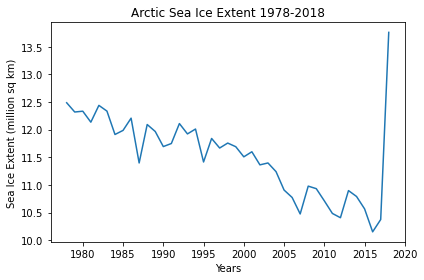

In [29]:
# x_axis = sea_ice_data['Year'].unique()
# tick_locations=[]
# for x in x_axis:
#     tick_locations.append(x)
# y_axis = sum_sea_ice[0]

sum_sea_ice_tp.plot(legend=False)

plt.title('Arctic Sea Ice Extent 1978-2018')
plt.xlabel('Years')
plt.ylabel('Sea Ice Extent (million sq km)')

plt.tight_layout()

In [ ]:
# x_axis = sea_ice_data["Date"]
# y_axis = sea_ice_data['MillionSqKm']

# plt.scatter(
#     x_axis,
#     y_axis,
#     marker='o',
#     facecolors='red',
#     edgecolors='black',
#     s=y_axis,
#     alpha=.75,)
# plt.title('Arctic Sea Ice Extent 1978-2018')
# plt.xlabel('Day(s) from Start of Study')
# plt.ylabel('Sea Ice Extent (million sq km)')

# plt.tight_layout()
# plt.show()